In [50]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [51]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [52]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
df.drop('customerID', inplace=True, axis = 1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [55]:
pd.to_numeric(df['TotalCharges'],errors='coerce').isnull().any()

True

In [56]:
df[df['TotalCharges'] == ' ']  # checking for blank values

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [94]:
df1 = df.copy()

In [58]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
df1['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [62]:
val = []
for x in df1['TotalCharges']:
    if x != ' ':
        val.append(x)

In [68]:
val = list(map(float, val)) # converting 'O' to 'float'

In [82]:
import statistics
statistics.median_grouped(val)  

1397.15

In [97]:
df1['TotalCharges'] = df1['TotalCharges'].replace(to_replace=' ', value = 1397.15)  #replacing ' ' with 1397.15


In [101]:
df1['TotalCharges'].isnull().any()

False

In [102]:
df1.TotalCharges.dtypes

dtype('O')

In [106]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])     # converting 'O' to 'float'      

In [108]:
df1.TotalCharges.dtypes

dtype('float64')

In [109]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [151]:
tenure_yes = df1[df1['Churn'] == 'Yes']['tenure']
tenure_no = df1[df1['Churn'] == 'No']['tenure']

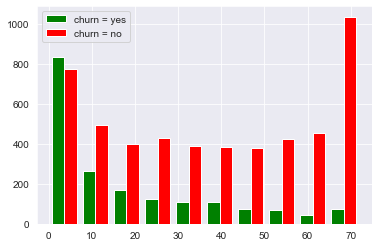

In [183]:
plt.hist([tenure_yes,tenure_no], color = ['green', 'red'], label = ['churn = yes', 'churn = no'])
plt.legend()

In [173]:
# knowing unique values
def get_unique(df):
    for col in df:
            print(f'{col} : {df[col].unique()}')

In [167]:
get_unique(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [164]:
df1.replace('No internet service', 'No',inplace=True)
df1.replace('No phone service', 'No',inplace=True)

In [165]:
get_unique(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [175]:
y_n_cols = [
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [170]:
for col in y_n_cols:
    df1[col].replace({'Yes': 1, 'No':0}, inplace=True)

In [174]:
get_unique(df1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [176]:
df1['gender'].replace({'Female':0, 'Male':1}, inplace = True)

In [178]:
df_final = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [179]:
df_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [180]:
df_final.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [184]:
scaler_col = ['MonthlyCharges', 'TotalCharges', 'tenure']

In [185]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_final[scaler_col] = scaler.fit_transform(df_final[scaler_col])

In [188]:
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [190]:
print(X_train.shape, X_test.shape)

(5282, 26) (1761, 26)


In [193]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow import keras
from keras.layers import Dense

In [250]:
model = Sequential()


model.add(Dense(26,activation = 'relu'))
model.add(Dense(26,activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = 'accuracy')


In [261]:
model.fit(X_train, y_train, epochs=150)

Epoch 1/150
166/166 [==============================] - 1s 3ms/step - loss: 0.3336 - accuracy: 0.8400
Epoch 2/150
166/166 [==============================] - 1s 3ms/step - loss: 0.3320 - accuracy: 0.8427
Epoch 3/150
166/166 [==============================] - 1s 4ms/step - loss: 0.3293 - accuracy: 0.8425
Epoch 4/150
166/166 [==============================] - 1s 4ms/step - loss: 0.3321 - accuracy: 0.8400
Epoch 5/150
166/166 [==============================] - 1s 3ms/step - loss: 0.3304 - accuracy: 0.8440
Epoch 6/150
166/166 [==============================] - 1s 3ms/step - loss: 0.3293 - accuracy: 0.8421
Epoch 7/150
166/166 [==============================] - 1s 3ms/step - loss: 0.3305 - accuracy: 0.8446
Epoch 8/150
166/166 [==============================] - 1s 3ms/step - loss: 0.3264 - accuracy: 0.8442
Epoch 9/150
166/166 [==============================] - 1s 3ms/step - loss: 0.3287 - accuracy: 0.8461
Epoch 10/150
166/166 [==============================] - 1s 3ms/step - loss: 0.3283 - accura

In [262]:
history = pd.DataFrame(model.history.history)

<AxesSubplot:>

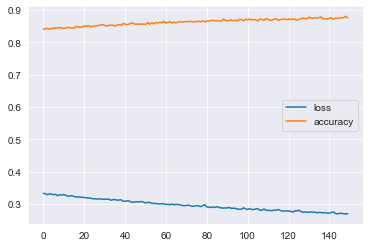

In [263]:
history.plot()

In [264]:
model.evaluate(X_test, y_test)

56/56 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.7729


[0.6382924914360046, 0.7728563547134399]

In [265]:
prediction = model.predict(X_test)

In [266]:
y_predict = []
for i in prediction:
    if i >= 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [267]:
y_predict[:10]

[1, 1, 0, 1, 0, 0, 0, 0, 0, 0]

In [268]:
y_test[:10]

6418    0
1948    1
4497    0
66      0
1705    0
924     0
1051    0
7012    0
3723    0
4590    0
Name: Churn, dtype: int64

In [269]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def get_score(prediction):
    print('confusion matirx:')
    print(confusion_matrix(y_test, prediction))
    print('\n')
    print('accuracy score:')
    print(f'{round((accuracy_score(y_test, prediction))*100, 2)}%')
    print('\n')
    print('classification report:')
    print(classification_report(y_test, prediction))

In [270]:
get_score(y_predict)

confusion matirx:
[[1110  198]
 [ 202  251]]


accuracy score:
77.29%


classification report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1308
           1       0.56      0.55      0.56       453

    accuracy                           0.77      1761
   macro avg       0.70      0.70      0.70      1761
weighted avg       0.77      0.77      0.77      1761

